In [1]:
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from numpy import random
from scipy.integrate import odeint

matplotlib.rcParams.update({'font.size': 16})

In [3]:
G = 1
m1 = 2
m2 = 3
m3 = 2.5
time = np.arange(0.0, 120.0, 0.01)

In [4]:
def hn2(y, t, m1, m2):
    
    px1, px2, py1, py2, qx1, qx2, qy1, qy2 = y
    
    px1_d = -1*(qx1-qx2)/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    px2_d = -1*(qx2-qx1)/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    py1_d = -1*(qy1-qy2)/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    py2_d = -1*(qy2-qy1)/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    
    qx1_d = px1/m1
    qx2_d = px2/m2
    qy1_d = py1/m1
    qy2_d = py2/m2
    
    dydt = [px1_d, px2_d, py1_d, py2_d, qx1_d, qx2_d, qy1_d, qy2_d]
    
    return dydt

In [5]:
def hn3(y, t, m1, m2, m3):
    
    px1, px2, px3, py1, py2, py3, qx1, qx2, qx3, qy1, qy2, qy3 = y
    
    m1m2x = (G*m1*m2*(qx1-qx2))/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    m2m3x = (G*m2*m3*(qx2-qx3))/(((qx2-qx3)**2 + (qy2-qy3)**2)**1.5)
    m3m1x = (G*m3*m1*(qx3-qx1))/(((qx3-qx1)**2 + (qy3-qy1)**2)**1.5)
    
    px1_d = m3m1x-m1m2x
    px2_d = m1m2x-m2m3x 
    px3_d = m2m3x-m3m1x
    
    m1m2y = (G*m1*m2*(qy1-qy2))/(((qx1-qx2)**2 + (qy1-qy2)**2)**1.5)
    m2m3y = (G*m2*m3*(qy2-qy3))/(((qx2-qx3)**2 + (qy2-qy3)**2)**1.5)
    m3m1y = (G*m3*m1*(qy3-qy1))/(((qx3-qx1)**2 + (qy3-qy1)**2)**1.5)
    
    py1_d = m3m1y-m1m2y
    py2_d = m1m2y-m2m3y
    py3_d = m2m3y-m3m1y
    
    qx1_d = px1/m1
    qx2_d = px2/m2
    qx3_d = px3/m3
    qy1_d = py1/m1
    qy2_d = py2/m2
    qy3_d = py3/m3
    
    dydt = [px1_d, px2_d, px3_d, py1_d, py2_d, py3_d, 
            qx1_d, qx2_d, qx3_d, qy1_d, qy2_d, qy3_d]
    
    return dydt

In [6]:
y03 = [0.5, -0.5, 0, 0.5, -0.5, 0.5, 5, 25, 14, 20, 20, 14]
y02 = [1, -1, -1, 1, 13, 15, 20, 20]

In [7]:
#sol = odeint(hn2, y02, time, args=(m1, m2))
sol = odeint(hn3, y03, time, args=(m1, m2, m3))

#if(True):
#    for i in range(0,len(time),20):
#        print("%16.12f %16.12f %16.12f %16.12f %16.12f %16.12f %16.12f %16.12f" %
#              (sol[i,0],sol[i,1],sol[i,2],sol[i,3],sol[i,4],sol[i,5],sol[i,6],sol[i,7]))
sol

array([[ 5.00000000e-01, -5.00000000e-01,  0.00000000e+00, ...,
         2.00000000e+01,  2.00000000e+01,  1.40000000e+01],
       [ 5.00505648e-01, -5.00569538e-01,  6.38901959e-05, ...,
         2.00024994e+01,  1.99983330e+01,  1.40020009e+01],
       [ 5.01011438e-01, -5.01139399e-01,  1.27961211e-04, ...,
         2.00049976e+01,  1.99966651e+01,  1.40040037e+01],
       ...,
       [ 8.88023577e-03, -2.73399051e-01,  2.64518815e-01, ...,
         3.43656204e+01,  3.21246537e+01,  1.19519193e+01],
       [ 1.06701657e-02, -2.75081962e-01,  2.64411797e-01, ...,
         3.43710747e+01,  3.21254497e+01,  1.19486006e+01],
       [ 1.24588196e-02, -2.76763656e-01,  2.64304836e-01, ...,
         3.43765249e+01,  3.21262478e+01,  1.19452827e+01]])

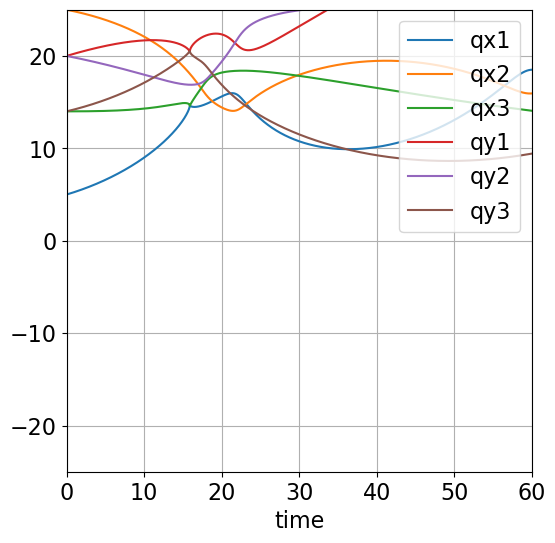

In [73]:
### plot the solution ###

plt.figure(figsize=(6,6))

#plt.plot(time, sol[:, 0], label='px1')
#plt.plot(time, sol[:, 1], label='px2')
#plt.plot(time, sol[:, 2], label='py1')
#plt.plot(time, sol[:, 3], label='py2')
#plt.plot(time, sol[:, 4], label='qx1')
#plt.plot(time, sol[:, 5], label='qx2')
#plt.plot(time, sol[:, 6], label='qy1')
#plt.plot(time, sol[:, 7], label='qy2')

#plt.plot(time, sol[:, 0], label='px1')
#plt.plot(time, sol[:, 1], label='px2')
#plt.plot(time, sol[:, 2], label='px3')

#plt.plot(time, sol[:, 3], label='py1')
#plt.plot(time, sol[:, 4], label='py2')
#plt.plot(time, sol[:, 5], label='py3')

plt.plot(time, sol[:, 6], label='qx1')
plt.plot(time, sol[:, 7], label='qx2')
plt.plot(time, sol[:, 8], label='qx3')

plt.plot(time, sol[:, 9], label='qy1')
plt.plot(time, sol[:, 10], label='qy2')
plt.plot(time, sol[:, 11], label='qy3')

plt.legend(loc='upper right')
plt.xlabel('time')
plt.grid()
plt.xlim((0.0,60.0))
plt.ylim((-25.0,25.0))
plt.show()

In [74]:
### animation parameters ###

xmin =  -20.0
xmax = 60.0
ymin =  -20.0
ymax = 60.0
tmin =  0.0
tmax = 10.0
vmin =  0.0
vmax =  1.0
dt   =  0.05

In [75]:
### define particle(s) ###

### (nb - ideally particles should move << 1 radius in dt) ### 

npart = 3

qx = np.array([5.0, 25.0, 14.0])

qy = np.array([20.0, 20.0, 14.0])

vx = np.array([0.0, 0.0, 0.0])

vy = np.array([0.0, 0.0, 0.0])

m = np.array([m1, m2, m3])

ax = np.zeros(npart)
ay = np.zeros(npart)

r  = np.ones(npart) * 0.2  # particle radius in simulation units
rp = 65*r                  # particle radius in points(?)

colors = ['b', 'g', 'r']

In [76]:
### create the animation frames ### 
    
iframe = 0

for i in range(0,len(time),50):

    ### output the current frame ###
    output_filename = '%d.png' % iframe
    
    fig = plt.figure(figsize=(6,6))

    plt.scatter(qx,qy,c=colors,s=rp*rp)
    
    plt.tick_params(
        axis='both',       # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        right=False,       # ticks along the right edge are off
        left=False,        # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False    # labels along the left edge are off
    ) 

    plt.grid()
    plt.axis([xmin,xmax,ymin,ymax])
    plt.title('Frame = '+str(int(iframe)))
    plt.savefig(output_filename,format="png")
    plt.close(fig)

    ### evolve the particle's position ###
    
    for j in range(0, npart):
        qx_temp = sol[i,6+j] 
        qy_temp = sol[i,9+j]
        
        
        qx[j] = qx_temp
        qy[j] = qy_temp
 

    iframe = iframe+1

In [77]:
### stitch together the frames to make a movie ### 
        
os.system("rm 3body.mp4")
os.system("ffmpeg -i %d.png -vf scale=432x432 3body.mp4")
os.system("rm *.png") 


ffmpeg version 2.8.15 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-36)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --extra-ldflags='-Wl,-z,relro ' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvorbis --enable-libv4l2 

0